# Assignment2_1

In [62]:
import cv2, os
import matplotlib.pyplot as plt

In [63]:
script_dir = os.getcwd() # os.path.dirname(os.path.abspath(__file__)) # Get the directory of the current script
script_dir

'c:\\Users\\JonathanChackoPattas\\OneDrive - Maritime Support Solutions\\Desktop\\Class Notes\\Seneca\\Semester 2\\AIG210 - Computer Vision\\Assignment 2 - Group 5'

In [44]:
def ipynb_cv_imshow(title, img):
    """
    Display an image in a Jupyter Notebook cell.
    """
    if img is None:
        print("Image not found or could not be read.")
        return
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## 1-	Brightness & Contrast:

### a.	Open a color image and display

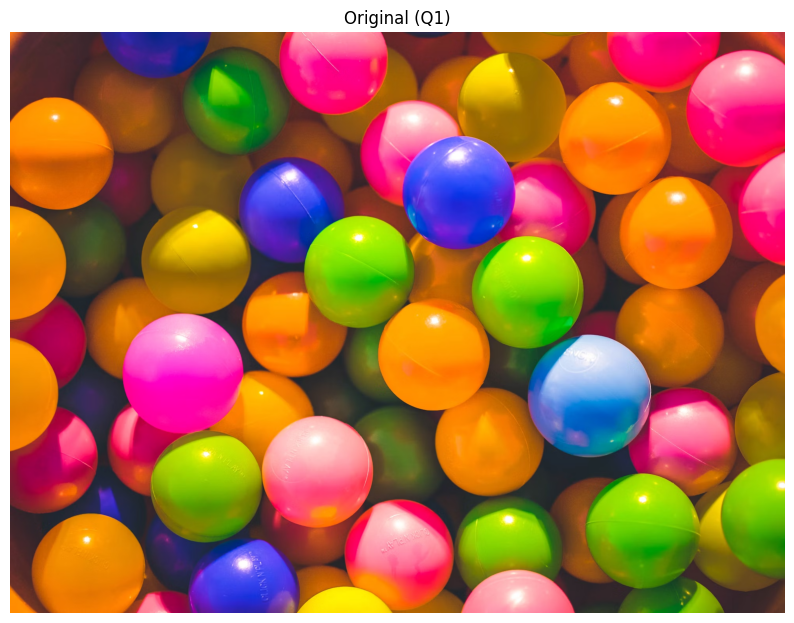

In [45]:
image_path = os.path.join(script_dir, 'balls.png')
img1 = cv2.imread(image_path)
# cv2.imshow("Original (Q1)", img1)
ipynb_cv_imshow("Original (Q1)", img1)

### b.	Change the brightness by a constant (e.g., 100). Display in a separate window.

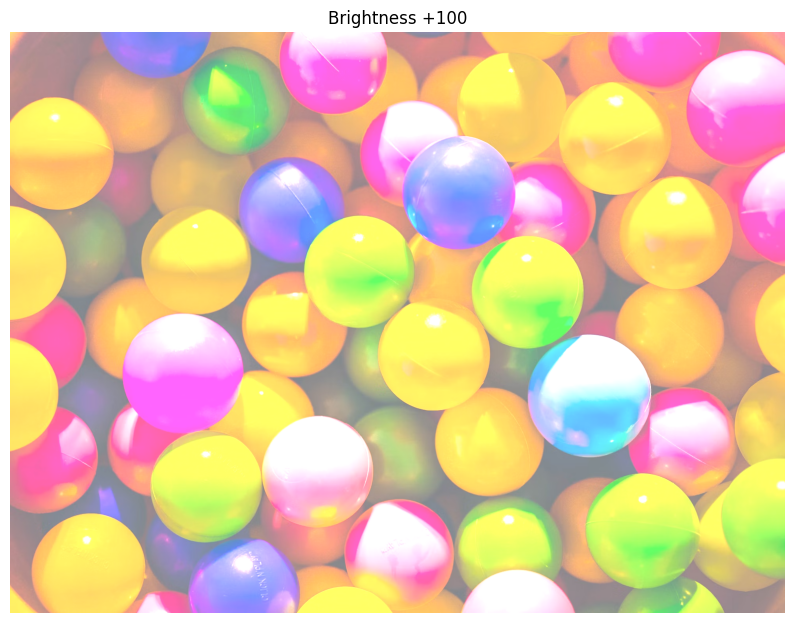

In [46]:
bright_img = cv2.convertScaleAbs(img1, alpha=1, beta=100)
# cv2.imshow("Brightness +100", bright_img)
ipynb_cv_imshow("Brightness +100", bright_img)

### c.	Change the contrast by a constant (e.g., 0.5, 2). Display in a separate window.

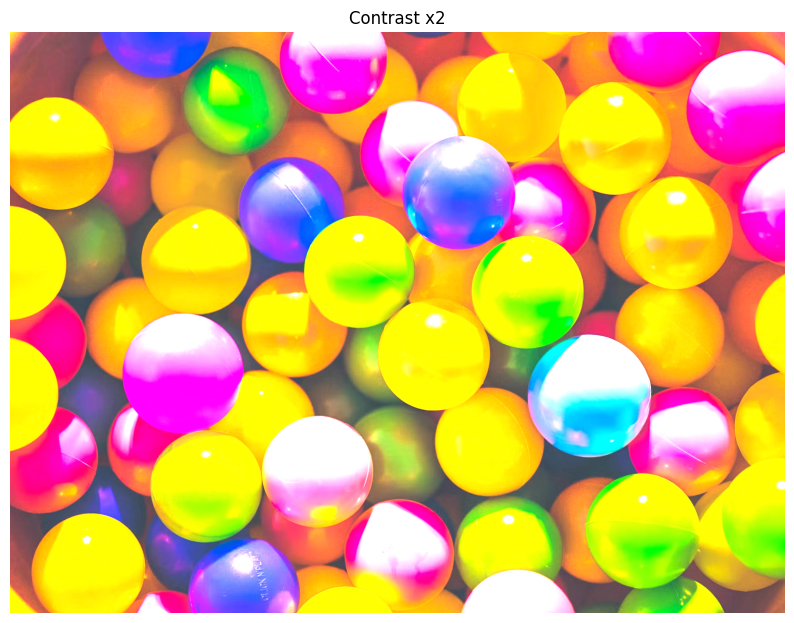

In [47]:
contrast_up = cv2.convertScaleAbs(img1, alpha=2.0, beta=0)
# cv2.imshow("Contrast x2", contrast_up)
ipynb_cv_imshow("Contrast x2", contrast_up)

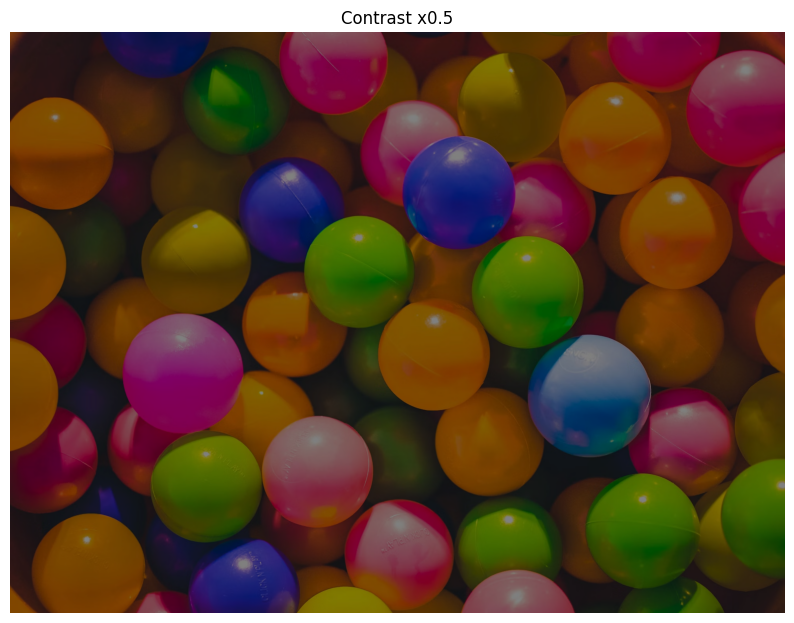

In [48]:
contrast_down = cv2.convertScaleAbs(img1, alpha=0.5, beta=0)
# cv2.imshow("Contrast x0.5", contrast_down)
ipynb_cv_imshow("Contrast x0.5", contrast_down)

## 2-	Linear blend:

### a.	Open a second images and display. Resize the second image to match the first, if needed.

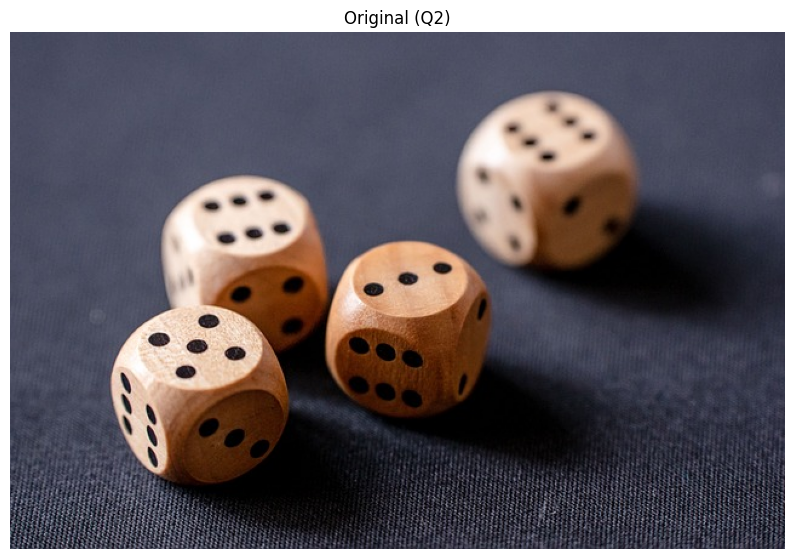

In [49]:
img2 = cv2.imread(os.path.join(script_dir, 'dices.jpg')) # Assuming a second image is available
# cv2.imshow("Original (Q2)", img2)
ipynb_cv_imshow("Original (Q2)", img2)

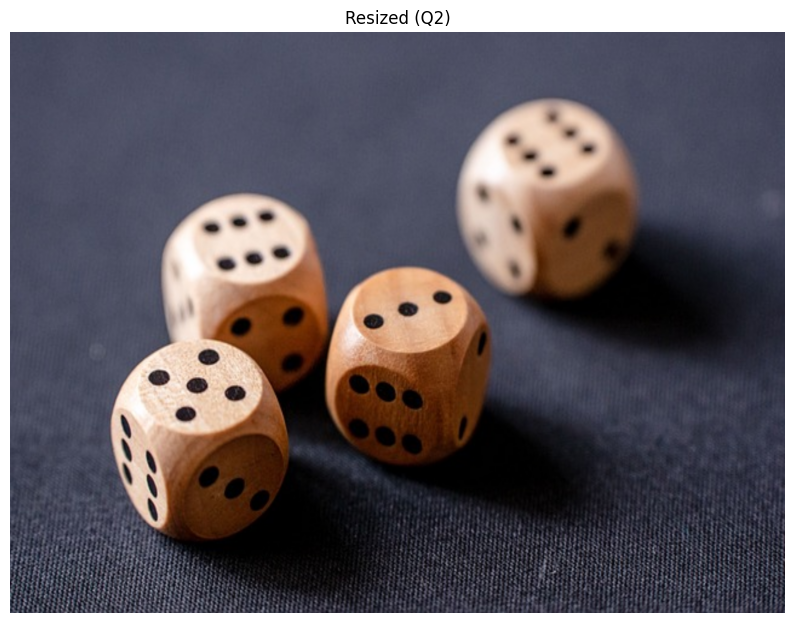

In [50]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
ipynb_cv_imshow("Resized (Q2)", img2)

In [51]:
images_for_gif = []

### c.	Paste the blended images at different stages of blending (at alpha = 0.2, alpha = 0.5, and alpha = 0.8).

In [52]:
alphas = [0.2, 0.5, 0.8]

### b.	Implement a linear blend of the two images: create a for loop to linearly blend these images, progressively varying the blending ratio (alpha) throughout the loop. 
> blend = (1 - alpha) * img1 + alpha * img2;

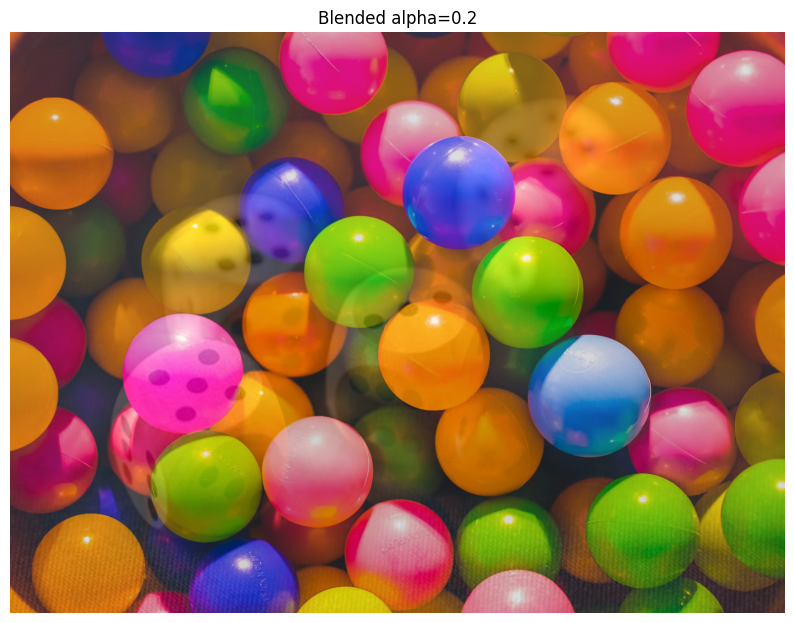

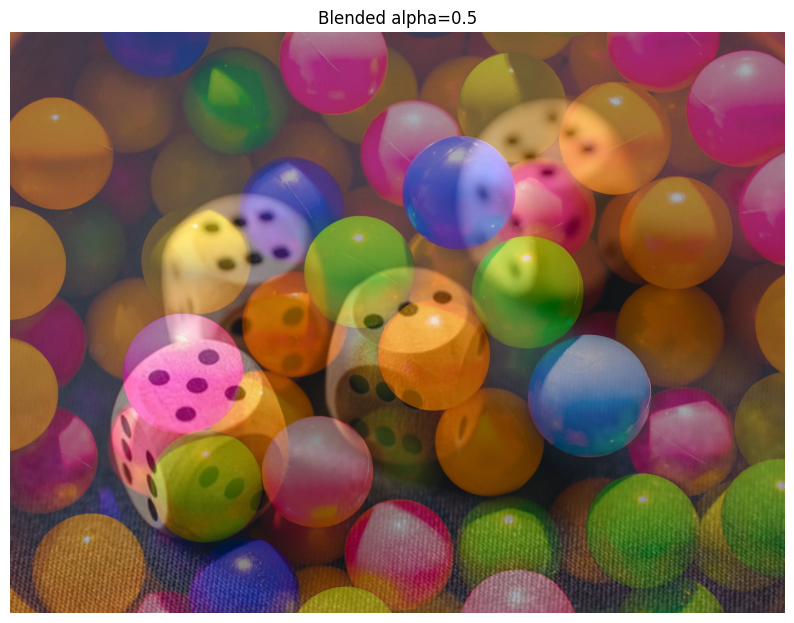

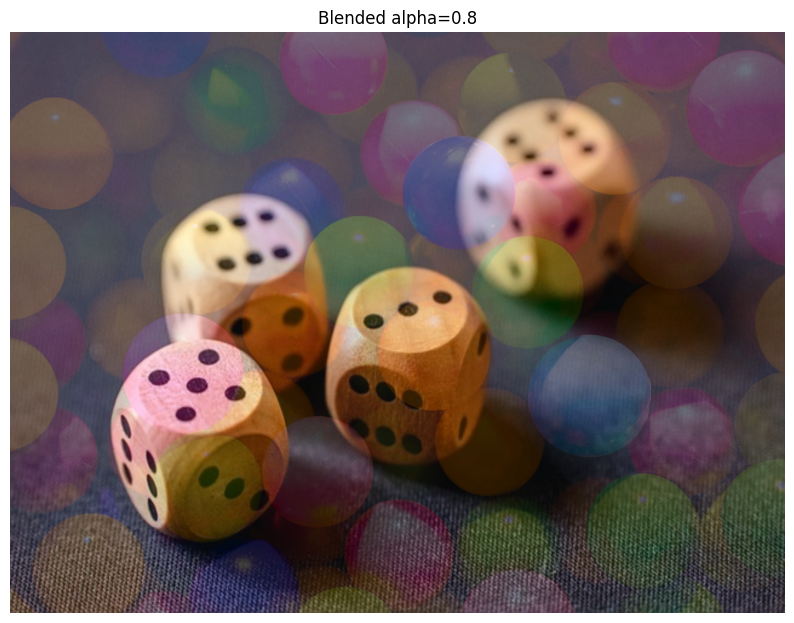

In [53]:
for alpha in alphas:    
    blended = cv2.addWeighted(
        src1=img1,
        alpha=1 - alpha,
        src2=img2,
        beta=alpha,
        gamma=0
    )
    win_name = f"Blended alpha={alpha}"
    # cv2.imshow(win_name, blended)
    # cv2.imwrite(os.path.join(script_dir, f'blend_alpha_{alpha}.jpg'), blended)
    ipynb_cv_imshow(win_name, blended)
    images_for_gif.append(blended)

### d.	(Optional) Save the blended images to a file, create a GIF animation, and submit it with the assignment.

In [54]:
gif_path = os.path.join(script_dir, 'blended_images.gif') # Save the images for GIF creation
import imageio # Create a GIF using imageio
with imageio.get_writer(gif_path, mode='I', duration=1) as writer:
    for img in images_for_gif:
        writer.append_data(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# from IPython.display import Image, display
# display(Image(filename=gif_path))  # Display the GIF in the notebook
print(f"GIF saved at: {gif_path}")

GIF saved at: c:\Users\JonathanChackoPattas\OneDrive - Maritime Support Solutions\Desktop\Class Notes\Seneca\Semester 2\AIG210 - Computer Vision\Assignment 2 - Group 5\blended_images.gif


## 3-	Histogram Equalization

### a.	Open ‘nail_polish’ (located in the ‘Assignment2_Files’ folder) and apply histogram equalization to it. To do so, convert the image to HSV color space, apply histogram equalization once on the ‘saturation’ channel and once on the ‘value’ channel.

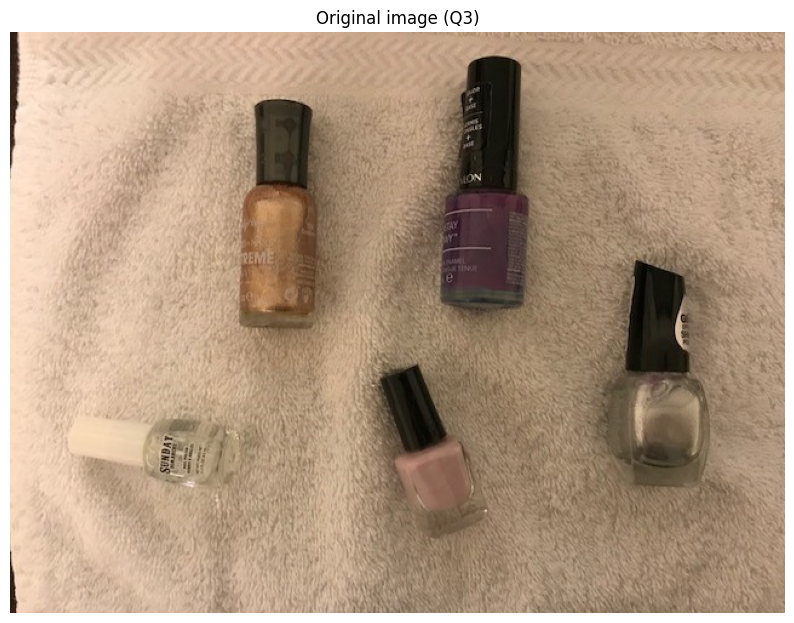

In [55]:
img = cv2.imread(os.path.join(script_dir, 'nail_polish.jpg')) # Assuming the image is available
ipynb_cv_imshow("Original image (Q3)", img)

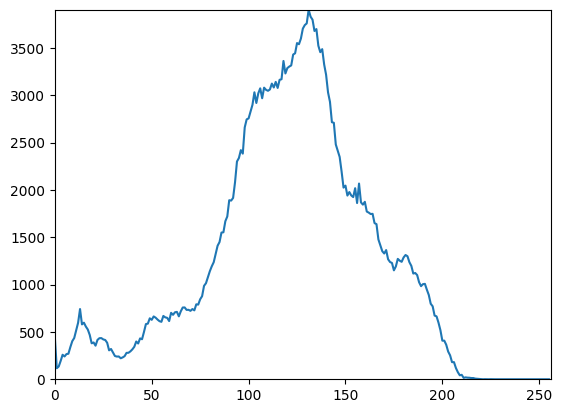

In [56]:
hist = cv2.calcHist(
    images=[img], # Calculate histogram for the image
    channels=[0], # Channel CORRESPONDING to a Color Channel (0=Blue, 1=Green, 2=Red in BGR)
    mask=None, # A Mask can be used to calculate histogram for a specific region
    histSize=[256], # Number of bins for the histogram
    ranges=[0, 256] # Range of pixel values
) # The X and Y axes of the histogram are pixel values and their frequencies, respectively.
plt.plot(hist)
plt.xlim([0, 256])
plt.ylim([0, max(hist)+1])
plt.show()

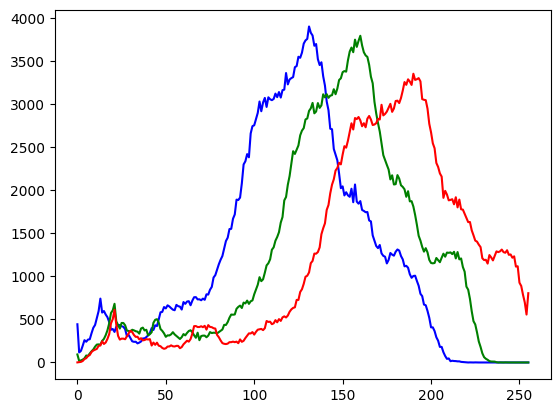

In [57]:
color = ('b','g','r')
for i,col in enumerate(color):
    hist = cv2.calcHist(
        images=[img],
        channels=[i], # Channel index for Blue, Green, Red
        mask=None,
        histSize=[256],
        ranges=[0, 256]
    )
    plt.plot(hist, color=col)
plt.show()

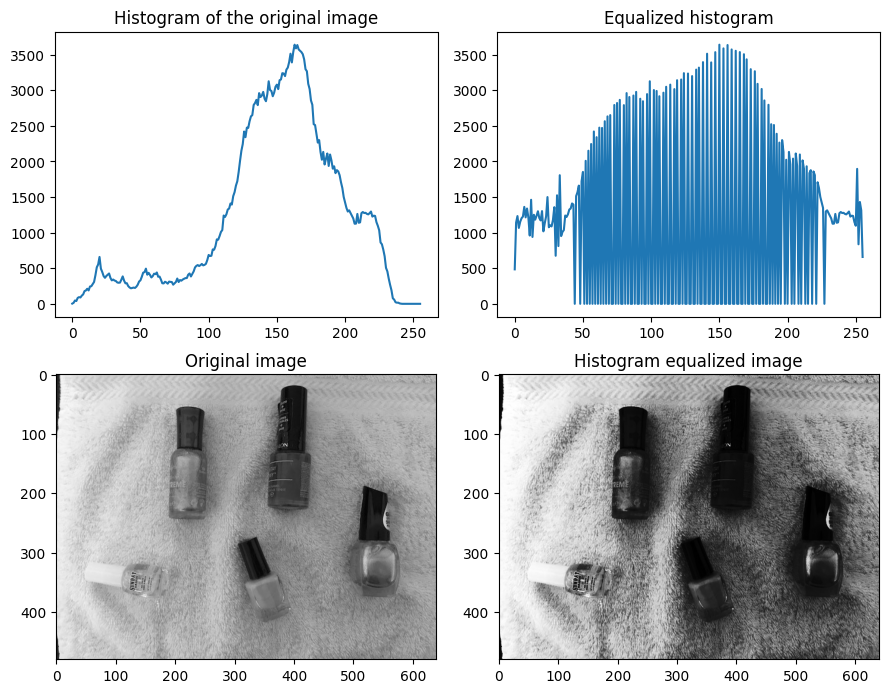

In [58]:
# Convert to grayscale if it's a color image
if len(img.shape) == 3:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray = img.copy()

# Apply histogram equalization
equalized_img = cv2.equalizeHist(gray)

# Calculate histograms
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
equalized_hist = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(9, 7))
ax[0, 0].plot(hist)
ax[0, 0].set_title("Histogram of the original image")
ax[0, 1].plot(equalized_hist)
ax[0, 1].set_title("Equalized histogram")
ax[1, 0].imshow(gray, cmap="gray")
ax[1, 0].set_title("Original image")
ax[1, 1].imshow(equalized_img, cmap="gray")
ax[1, 1].set_title("Histogram equalized image")
plt.tight_layout()
plt.show()

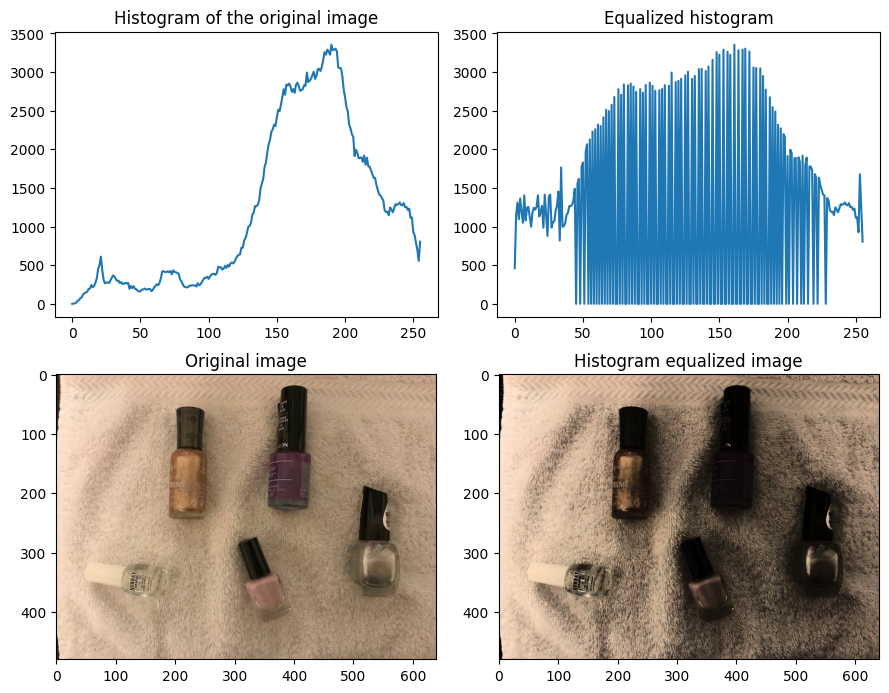

In [59]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv_equalized = img_hsv
img_hsv_equalized[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2])
equalized_img = cv2.cvtColor(img_hsv_equalized, cv2.COLOR_HSV2BGR)

hist = cv2.calcHist([img],[2], None, [256], [0, 256])
equalized_hist = cv2.calcHist([img_hsv_equalized], [2], None, [256], [0, 256])
# for i in range(3):
#     fig, ax = plt.subplots(2, 2, figsize=(9, 7)) # Plotting
#     ax[0, 0].plot(hist, color=('b', 'g', 'r')[i])
#     ax[0, 0].set_title("Histogram of the original image")
#     ax[0, 1].plot(equalized_hist, color=('b', 'g', 'r')[i])
#     ax[0, 1].set_title("Equalized histogram")
#     ax[1, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     ax[1, 0].set_title("Original image")
#     ax[1, 1].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
#     ax[1, 1].set_title("Histogram equalized image")
#     plt.tight_layout()
#     plt.show()
fig, ax = plt.subplots(2, 2, figsize=(9, 7)) # Plotting
ax[0, 0].plot(hist)
ax[0, 0].set_title("Histogram of the original image")
ax[0, 1].plot(equalized_hist)
ax[0, 1].set_title("Equalized histogram")
ax[1, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title("Original image")
ax[1, 1].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("Histogram equalized image")
plt.tight_layout()
plt.show()

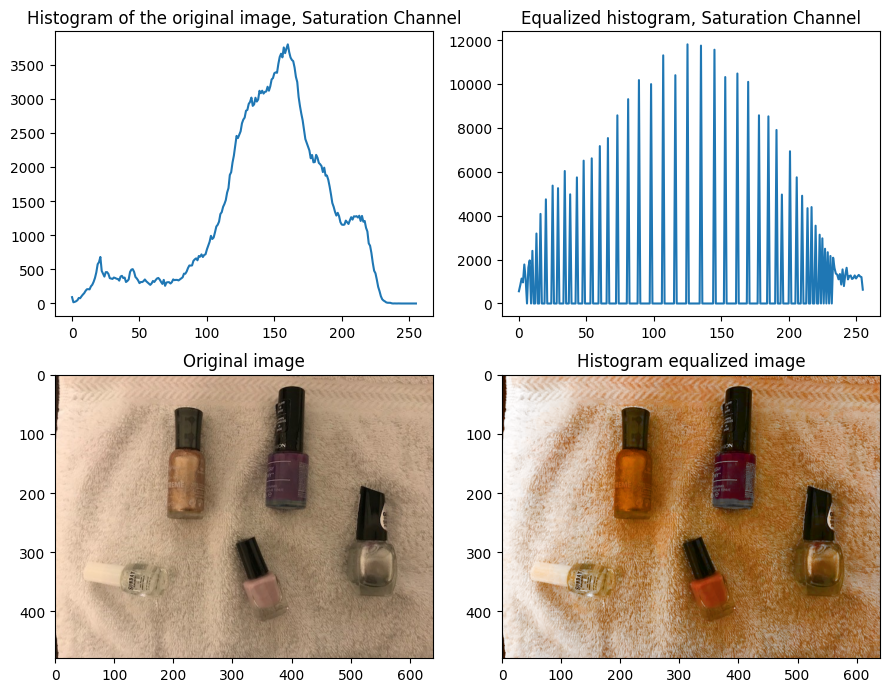

In [60]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv_equalized = img_hsv
img_hsv_equalized[:,:,1] = cv2.equalizeHist(img_hsv[:,:,1])
equalized_img = cv2.cvtColor(img_hsv_equalized, cv2.COLOR_HSV2BGR) # This is to Convert back to BGR after equalization
hist = cv2.calcHist([img],[1], None, [256], [0, 256])
equalized_hist = cv2.calcHist([img_hsv_equalized], [1], None, [256], [0, 256])
# # cv2.imshow("original image", img)
# ipynb_cv_imshow("original image", img)
# # cv2.imshow("equalized image", equalized_img)
# ipynb_cv_imshow("equalized image", equalized_img)
# fig, ax = plt.subplots(1, 2, figsize=(11,5))
fig, ax = plt.subplots(2, 2, figsize=(9, 7)) # Plotting
ax[0, 0].plot(hist)
ax[0, 0].set_title("Histogram of the original image, Saturation Channel")
ax[0, 1].plot(equalized_hist)
ax[0, 1].set_title("Equalized histogram, Saturation Channel")
ax[1, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title("Original image")
ax[1, 1].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("Histogram equalized image")
# ax[0].plot(hist)
# ax[0].set_title("Histogram of the original image, Saturation Channel")
# ax[1].plot(equalized_hist)
# ax[1].set_title("Equalized histogram, Saturation Channel")
plt.tight_layout()
plt.show()

In [61]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()